In [3]:
!pip install binarytree

In [4]:
from binarytree import tree, bst, heap, build

In [5]:
from scipy import misc

In [6]:
import pandas as pd
import numpy as np
import datetime as dt
import math
import decimal
from matplotlib import pyplot as plt
from IPython.display import Image
from IPython.display import SVG, display

In [7]:
u = (1.10+29/100)
u

1.3900000000000001

In [8]:
d = 1/u
d

0.7194244604316546

In [9]:
from binarytree import tree, bst, heap, build

In [10]:
def buildtree(S, N, u, d):
    """
    :rtype: TreeNode
    """
    h = 0
    data = dict()
    data[h] = [S]
    
    def buildtree_recursive(h, startingval, data):
        h +=1 
        if h > N:
            return data
        leftval = np.round(startingval*d,2)
        rightval = np.round(startingval*u, 2)
        if data.get(h, 0) == 0:
            data[h] = [leftval, rightval]
        else:
            data[h].extend([leftval, rightval])
        data = buildtree_recursive(h, leftval, data)
        data = buildtree_recursive(h, rightval, data)        
        return data
    tree = buildtree_recursive(h, S, data)
    return tree

## Binary tree for N=5

In [11]:
# Build a breadth-first binary tree
t1 = buildtree(1, 4,u,d)
data1 = []
for k, v in t1.items():
    data1.extend(v)

In [12]:
# Build a tree from list representation
values = data1.copy()
root = build(values)
print(root)


                                     __________________________________1_________________________________
                                    /                                                                    \
                  ________________0.72_______________                                     _______________1.39_______________
                 /                                   \                                   /                                  \
        _______0.52______                      ______1.0_____                    ______1.0_____                      _______1.93______
       /                 \                    /              \                  /              \                    /                 \
   __0.37_             __0.72_            __0.72_           _1.39_          __0.72_           _1.39_             _1.39_             __2.68_
  /       \           /       \          /       \         /      \        /       \         /      \           /      \    

## Binary tree for N=6

In [20]:
# Build a breadth-first binary tree
t1 = buildtree(1, 6, u, d)
data1 = []
for k, v in t1.items():
    data1.extend(v)

In [21]:
# Build a tree from list representation
values = data1.copy()
root = build(values)

In [22]:
svgdata6 = root.svg()
with open('binarytree6.svg', 'w') as f:
    f.write(svgdata6)

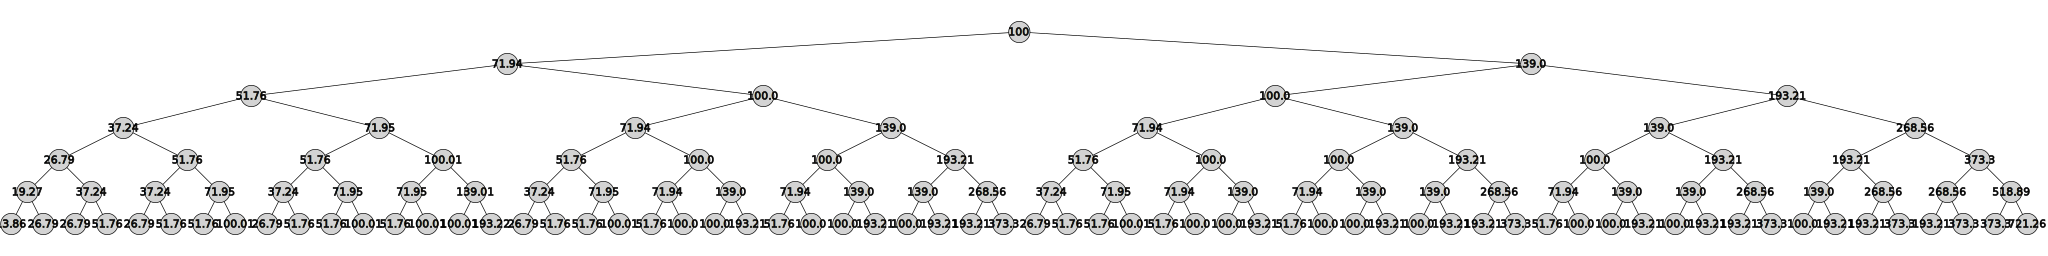

In [24]:
SVG(url='https://drive.google.com/uc?export=view&id=1OUtdpTQf0cBZ6SsBsRT5geq7DmgDywJY')

## Binary tree for N=4000

In [25]:
def factorial(n):
    k = decimal.Decimal(1)
    for i in range(1,n):
        k = k*i
    return k

def combin(N, r):
    # N = decimal.Decimal(N)
    # r = decimal.Decimal(r)
    return int(factorial(N)/(factorial(r)*factorial(N-r)))

def finalprice(N, r, u, d):
    u1 = decimal.Decimal(u)
    d1 = decimal.Decimal(d)
    return u1**r*d1**(N+1-r)

def plot_finalprices(N, u, d):
    x = [finalprice(N, x, u, d) for x in range(1, N+1)]
    y = [combin(N+1, x)  for x in range(1, N+1)]
    df = pd.DataFrame({'x': x, 'y': y})
    return df


In [30]:
N = 4000
u = 1+(0.10+29/100)/N
d=1/u

In [31]:
df = plot_finalprices(4000, u, d)

In [32]:
df

,x,y
0,0.6771357606276349850888744908,3999
1,0.6772678085379793358876088816,15996000
2,0.6773998821989214843092758036,31976003999
3,0.6775319816154830417160372718,42602695995999
4,0.6776641067926865987320076175,42560093300003999
...,...,...
3995,1.475657320457405216583495253,42560093300003999
3996,1.475945087662862112869883523,42602695995999
3997,1.476232910985659660306360944,31976003999
3998,1.476520790436741273785382742,15996000


In [36]:
df['x'] = df['x'].astype('float')

In [40]:
df['z'] = [float(decimal.Decimal(x)/10**1200) for x in df['y']]

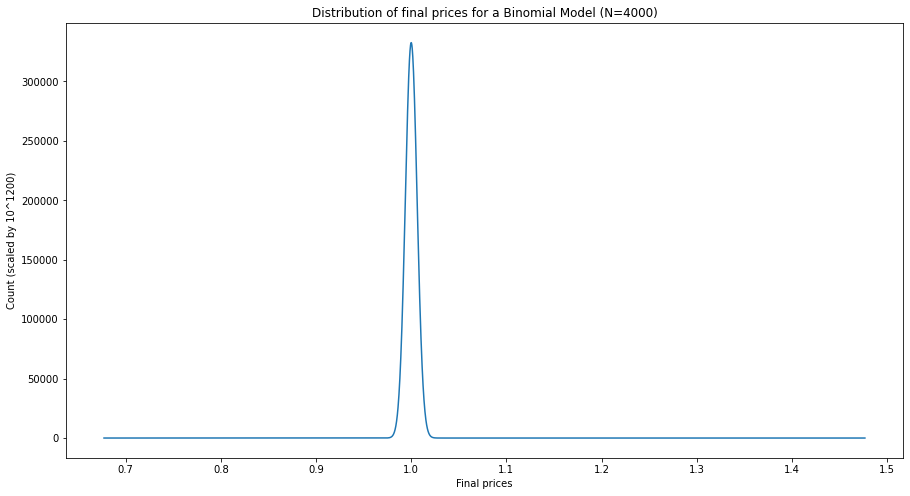

In [41]:
plt.figure(figsize=(15,8))
plt.plot(df['x'], df['z'])
plt.xlabel('Final prices')
plt.ylabel('Count (scaled by 10^1200)')
z=plt.title('Distribution of final prices for a Binomial Model (N=4000)')